<b> <h1> Basic Programming Project - File Preparation and Data Exploration

<p>Author: Saffanah Fathin
<p>Python Version 3.10
<p>Encoding: utf-8

Summary: The following script of python codes is divided into three parts. Part 1 is regarding file preparation, Part 2 is about Data Exploration and Part 3 is where I conclude my opinion about the corpus.

<b> <h3> PART 1 - FILE PREPARATION

In [1]:
#importing nltk library
import nltk

#reading the file
with open('en_ewt-ud-train.conllu', 'r', encoding='UTF-8') as rfile:
    with open('en_ewt-ud-train_preproc.conllu', 'w', encoding='UTF-8') as wfile:    
        for line in rfile.readlines():
            if line[0] != '#': #removing sentence started with tag
                wfile.write(line)

In [2]:
#ignoring all the collumns except the sentences and POS
from nltk.corpus.reader.conll import ConllCorpusReader
corpus = ConllCorpusReader('./', ['en_ewt-ud-train_preproc.conllu'], 
                           ['ignore', 'words', 'ignore', 'pos', 'ignore', 'ignore', 'ignore', 'ignore', 'ignore', 'ignore'])


Accessing a list with all the words:

In [3]:
corpus.words()

['Al', '-', 'Zaman', ':', 'American', 'forces', ...]

Accessing a list with all the sentences:

In [4]:
corpus.sents()

[['Al', '-', 'Zaman', ':', 'American', 'forces', 'killed', 'Shaikh', 'Abdullah', 'al', '-', 'Ani', ',', 'the', 'preacher', 'at', 'the', 'mosque', 'in', 'the', 'town', 'of', 'Qaim', ',', 'near', 'the', 'Syrian', 'border', '.'], ['[', 'This', 'killing', 'of', 'a', 'respected', 'cleric', 'will', 'be', 'causing', 'us', 'trouble', 'for', 'years', 'to', 'come', '.', ']'], ...]

Accessing a list with all the pos-tagged words:

In [5]:
corpus.tagged_words()

[('Al', 'PROPN'), ('-', 'PUNCT'), ('Zaman', 'PROPN'), ...]

Accessing a list with all the pos-tagged sentences:

In [6]:
corpus.tagged_sents()

[[('Al', 'PROPN'), ('-', 'PUNCT'), ('Zaman', 'PROPN'), (':', 'PUNCT'), ('American', 'ADJ'), ('forces', 'NOUN'), ('killed', 'VERB'), ('Shaikh', 'PROPN'), ('Abdullah', 'PROPN'), ('al', 'PROPN'), ('-', 'PUNCT'), ('Ani', 'PROPN'), (',', 'PUNCT'), ('the', 'DET'), ('preacher', 'NOUN'), ('at', 'ADP'), ('the', 'DET'), ('mosque', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('town', 'NOUN'), ('of', 'ADP'), ('Qaim', 'PROPN'), (',', 'PUNCT'), ('near', 'ADP'), ('the', 'DET'), ('Syrian', 'ADJ'), ('border', 'NOUN'), ('.', 'PUNCT')], [('[', 'PUNCT'), ('This', 'DET'), ('killing', 'NOUN'), ('of', 'ADP'), ('a', 'DET'), ('respected', 'ADJ'), ('cleric', 'NOUN'), ('will', 'AUX'), ('be', 'AUX'), ('causing', 'VERB'), ('us', 'PRON'), ('trouble', 'NOUN'), ('for', 'ADP'), ('years', 'NOUN'), ('to', 'PART'), ('come', 'VERB'), ('.', 'PUNCT'), (']', 'PUNCT')], ...]

<b> Stop Words in English

In [7]:
#using nltk to import stopwords
from nltk.corpus import stopwords
#nltk.download('stopwords')

#storing the english stopwords in a variable
en_stopwords = set(stopwords.words('english'))

<h3> PART 2 - DATA EXPLORATION

Creating an object to store the frequency of each word in the corpus.

In [8]:
#calling the library
from nltk import FreqDist

#storing all the frequency of words in the corpus data
freqs = FreqDist(corpus.words())

#number of tokens
freqs.N()

207229

1. What are the most frequent words? Create a bar plot with the 100 most frequent ones in the x-axis and their frequency in the y-axis.

In [9]:
#using matplotlib to create the plot
import matplotlib.pyplot as plt

In [10]:
#defining a function to create a bar plot
def barplot_frequency(tokens, freqs, path_name):
    
    """ 
    Create a bar plot with tokens in the x-axis and their frequency in the y-axis.
    The plot is saved as a pdf in the current directory.
    
    Parameters
    ----------
    tokens : list
        List of tokens.
    freqs : list
        List with frequencies of the corresponding tokens.
    file_name : str
        Name of the file to save the plot.

    Returns
    -------
    None.
    """
    fig = plt.figure(figsize=(25,5))
    
    x = [i for i in range(len(tokens))]
    plt.bar(x, freqs, tick_label=tokens, align='center', color='lightblue')
    plt.xticks(rotation='45')
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.title('Most frequent words in the corpus')
    plt.savefig('word_freq')
    plt.show()

In [11]:
#storing 100 most frequent words in the corpus to a variable
top_words = freqs.most_common()[:100]

#removing stopwords and punctuation before creating the plot:
top_non_stopwords = [(word, freq) for (word, freq) in freqs.most_common() if word.isalpha() and word.lower() not in en_stopwords][:100]

The list of most 100 frequent words in the corpus is as follow:

In [12]:
top_non_stopwords

[('would', 578),
 ('one', 437),
 ('like', 393),
 ('time', 385),
 ('get', 378),
 ('know', 339),
 ('also', 282),
 ('could', 278),
 ('go', 262),
 ('good', 259),
 ('said', 233),
 ('people', 233),
 ('back', 232),
 ('work', 220),
 ('Bush', 211),
 ('want', 209),
 ('even', 203),
 ('way', 201),
 ('new', 199),
 ('going', 191),
 ('see', 189),
 ('place', 188),
 ('need', 186),
 ('may', 183),
 ('take', 182),
 ('well', 176),
 ('think', 173),
 ('make', 172),
 ('much', 169),
 ('year', 168),
 ('us', 167),
 ('day', 166),
 ('US', 162),
 ('many', 162),
 ('great', 160),
 ('Thanks', 159),
 ('food', 158),
 ('two', 157),
 ('service', 157),
 ('call', 149),
 ('years', 148),
 ('best', 148),
 ('first', 147),
 ('help', 145),
 ('really', 141),
 ('Please', 141),
 ('made', 140),
 ('use', 140),
 ('still', 138),
 ('say', 130),
 ('never', 129),
 ('got', 125),
 ('give', 122),
 ('let', 121),
 ('around', 120),
 ('right', 120),
 ('Iraq', 119),
 ('find', 119),
 ('sure', 115),
 ('last', 114),
 ('world', 114),
 ('please', 113),

Creating the bar plot:

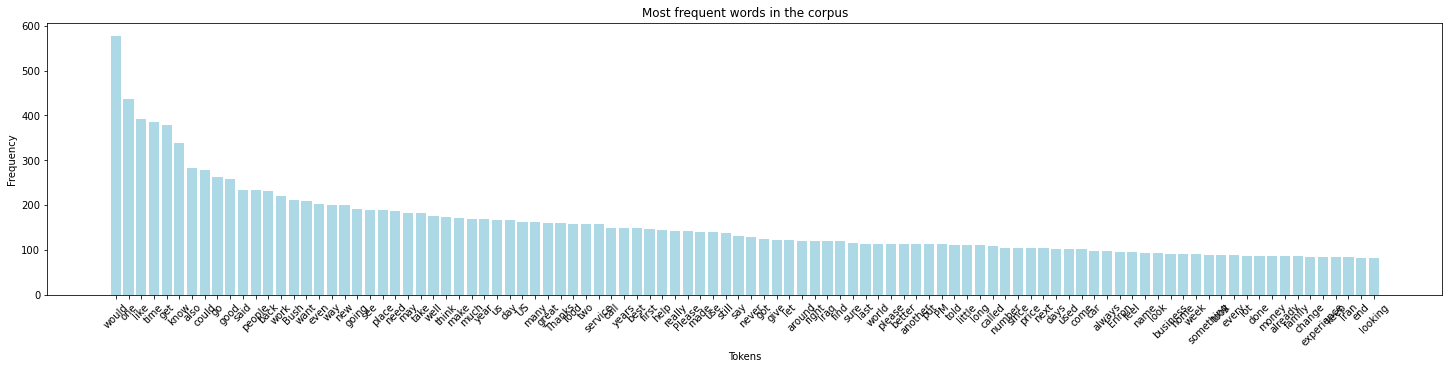

In [13]:
#defining the x and y axis
x = [w for (w, f) in top_non_stopwords]
y = [f for (w, f) in top_non_stopwords]

#creating the bar plot using the pre-defined function
barplot_frequency(x, y, 'word_freq.pdf')

2. What words appear less than 10 times? Create a word cloud with them.

In [14]:
#creating a list with words that appear less than 10 times
rare_words = [word for word, freq in freqs.items() if freq <= 10]

#updating the rare words without stopwords and punctuations
rare_non_stopwords = [word for word in rare_words if word.isalpha() and word.lower() not in en_stopwords]

The words that appear less than 10 times in the corpus are as follow:

In [15]:
rare_non_stopwords

['Zaman',
 'Shaikh',
 'Abdullah',
 'Ani',
 'preacher',
 'mosque',
 'Qaim',
 'Syrian',
 'respected',
 'cleric',
 'causing',
 'DPA',
 'announced',
 'busted',
 'cells',
 'Ministry',
 'Interior',
 'MoI',
 'equivalent',
 'Edgar',
 'Hoover',
 'unwittingly',
 'employ',
 'Weathermen',
 'bombers',
 'investment',
 'manipulating',
 'bombing',
 'targets',
 'Ghazaliyah',
 'districts',
 'announcement',
 'identifying',
 'breaking',
 'Baathists',
 'penetrate',
 'hopeful',
 'reminds',
 'ARVN',
 'secretly',
 'Guerrillas',
 'Kurdistan',
 'Democratic',
 'kidnapping',
 'Mosul',
 'commander',
 'Ninevah',
 'Province',
 'bombings',
 'declined',
 'percent',
 'whereas',
 'jump',
 'kidnappings',
 'guerrillas',
 'kidnapped',
 'cosmetic',
 'surgeon',
 'Suwayrah',
 'Kut',
 'discovered',
 'detonated',
 'southeastern',
 'overwhelmingly',
 'Shiite',
 'lookout',
 'Baathist',
 'saboteurs',
 'willingly',
 'willingness',
 'opposed',
 'center',
 'Kadhim',
 'Talal',
 'Husain',
 'assistant',
 'dean',
 'Education',
 'Mustansi

Creating the Word Cloud for visualization:

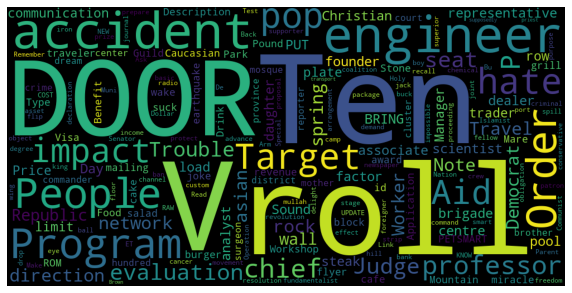

In [16]:
#importing wordcloud library
from wordcloud import WordCloud

#convert the list of rare words to a string
text=(" ").join(rare_non_stopwords)

#generate the word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud"+".png", bbox_inches='tight')
plt.show()
plt.close()

3. What is the distribution of POS tags? Create a plot.

In [17]:
#import the Freqdist library
from nltk import FreqDist

#frequency of POS Tags
pos_freqs = FreqDist([pos for (word, pos) in corpus.tagged_words()])

The distribution of POS tags in the corpus is as follow:

In [18]:
print(pos_freqs)

<FreqDist with 18 samples and 207229 outcomes>


Creating a plot to visualize the distribution of POS tags

In [19]:
#defining a function to create a pie chart
def pie_chart(labels, sizes, file_path):
    """
    Create a pie chart with the labels and their respective proportions.

    Parameters
    ----------
    labels : list
        A list of labels.
    sizes : list
        The size of each label (will be turned into proportions).
    file_path : str
        Name of the file to save the plot.

    Returns
    -------
    None.
    """
        
    fig = plt.figure(figsize=(10, 10))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    
    plt.show()
    plt.savefig(file_path)

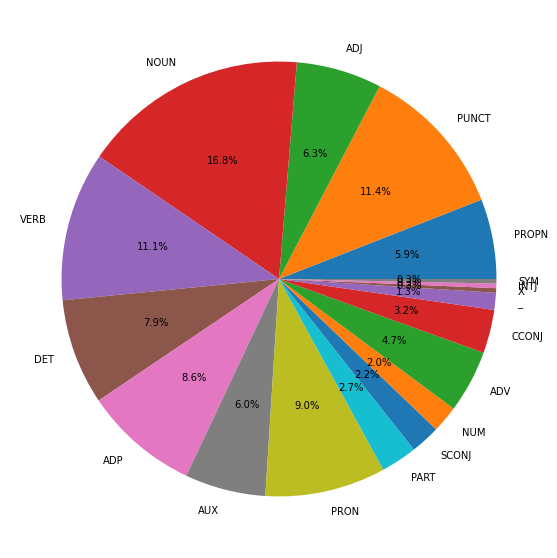

<Figure size 432x288 with 0 Axes>

In [20]:
#defining the x and y axises
x = list(pos_freqs.keys())[:18]
y = list(pos_freqs.values())[:18]

#generating the pie chart using the pre-defined function
pie_chart(x, y, 'pie_chart.png')

4. What is the distribution of sentence length? Create a plot.

In [21]:
#sentence length
sent_lens = [len(s) for s in corpus.sents()]

In [22]:
#frequency of sentence length
len_freqs = FreqDist(sent_lens)

Creating a histogram to visualize the distribution of the sentence length in the corpus

In [23]:
#defining a function to create a histogram
def histogram(values, file_path):
    
    plt.hist(values, bins=100)
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sentence Length')
    plt.show()
    #plt.savefig('sent_len_hist.pdf')

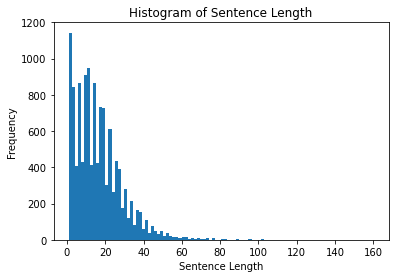

In [24]:
#plotting the histogram for the distribution of sentence length of the corpus
histogram(sent_lens, 'sent_len_hist.png')

<b> PART 3 - CONCLUSION

What do you think of this corpus?

In general, this corpus data is interesting because these sentences are, I assume, of spoken English with various context. Some of sentences might be hard to understand without knowing the context. Meanwhile, several sentences are more like a combination of two phrases or two clauses. 

After doing the data exploration, I also found interesting findings that may be can be used to anylze more linguistically. For example of how the most frequent word occurs in the corpus is of modal verb ('would', 578), or that the rare words are mostly of specific foreign word or proper names, or that based on the POS data, we can see that Noun is the most frequently used in English sentences. 

In conclusion, this corpus data might not be ideal for sentence guessing game. However, I believe that we can still manipulate them in a way that it is "suitable" to be used. Another idea that I have while doing the later guessing game codes, is that it will be great if we give a topic for the sentence so it is easier for the player to guess. Also, we can also store several words into certain categories that can be used to the hint.